In [1]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import numpy as np
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Deepak
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
twitter_data=pd.read_csv('C:\\Users\Deepak Kumar\\OneDrive\Desktop\\class notes\\ML\\twitter sentment dataset\\training.1600000.processed.noemoticon.csv',encoding = 'ISO-8859-1')

In [6]:
twitter_data.shape

(1599999, 6)

In [7]:
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [8]:
# renaming the columns and reading the dataset

column_names= ['target','id','date','flag','user','text']

twitter_data=pd.read_csv('C:\\Users\Deepak Kumar\\OneDrive\Desktop\\class notes\\ML\\twitter sentment dataset\\training.1600000.processed.noemoticon.csv',names=column_names,encoding = 'ISO-8859-1')

In [9]:
twitter_data.shape

(1600000, 6)

In [10]:
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
twitter_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [12]:
twitter_data['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [13]:
twitter_data.replace({'target':{4:1}},inplace=True)

In [14]:
twitter_data['target'].value_counts()

0    800000
1    800000
Name: target, dtype: int64

In [15]:
#stemming is the processs of reducing a word to its root word= 
#ex actor,acting,actress= act

port_stem = PorterStemmer()


In [16]:
def stemming(content):
    
    # Remove non-alphabetic characters
    stemmed_content= re.sub('[^a-zA-Z]',' ',content)

    stemmed_content= stemmed_content.lower()
    
     # Tokenize the text
    stemmed_content= stemmed_content.split()
    
    # Apply stemming and remove stopwords
    stemmed_content= [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    
     # Join the stemmed words back into a string
    stemmed_content= ' '.join(stemmed_content)
    
    return stemmed_content

In [17]:
twitter_data['stemmed_content'] = twitter_data['text'].apply(stemming)

In [19]:
 twitter_data.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [20]:
print(twitter_data['stemmed_content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [21]:
print(twitter_data['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


In [23]:
#separating the data and label
X=twitter_data['stemmed_content'].values
Y=twitter_data['target'].values

In [25]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [26]:
print(Y)

[0 0 0 ... 1 1 1]


In [37]:
#splitting the data to the taining data and test data


X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2,stratify=Y, random_state=2)

In [38]:
print(X.shape,X_train.shape,X_test.shape)

(1600000,) (1280000,) (320000,)


In [39]:
print(X_train)

['watch saw iv drink lil wine' 'hatermagazin'
 'even though favourit drink think vodka coke wipe mind time think im gonna find new drink'
 ... 'eager monday afternoon'
 'hope everyon mother great day wait hear guy store tomorrow'
 'love wake folger bad voic deeper']


In [40]:
print(X_test)

['mmangen fine much time chat twitter hubbi back summer amp tend domin free time'
 'ah may show w ruth kim amp geoffrey sanhueza'
 'ishatara mayb bay area thang dammit' ...
 'destini nevertheless hooray member wonder safe trip' 'feel well'
 'supersandro thank']


In [41]:
#converting the textual data to numerical data

vectorizer=TfidfVectorizer()

X_train= vectorizer.fit_transform(X_train)
X_test= vectorizer.transform(X_test)

In [42]:
print(X_train)

  (0, 443066)	0.4484755317023172
  (0, 235045)	0.41996827700291095
  (0, 109306)	0.3753708587402299
  (0, 185193)	0.5277679060576009
  (0, 354543)	0.3588091611460021
  (0, 436713)	0.27259876264838384
  (1, 160636)	1.0
  (2, 288470)	0.16786949597862733
  (2, 132311)	0.2028971570399794
  (2, 150715)	0.18803850583207948
  (2, 178061)	0.1619010109445149
  (2, 409143)	0.15169282335109835
  (2, 266729)	0.24123230668976975
  (2, 443430)	0.3348599670252845
  (2, 77929)	0.31284080750346344
  (2, 433560)	0.3296595898028565
  (2, 406399)	0.32105459490875526
  (2, 129411)	0.29074192727957143
  (2, 407301)	0.18709338684973031
  (2, 124484)	0.1892155960801415
  (2, 109306)	0.4591176413728317
  (3, 172421)	0.37464146922154384
  (3, 411528)	0.27089772444087873
  (3, 388626)	0.3940776331458846
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 390130)	0.22064742191076112
  (1279996, 434014)	0.2718945052332447
  (1279996, 318303)	0.21254698865277746
  (1279996, 237899)	0.2236567560099234
  (1279996, 2910

In [43]:
print(X_test)

  (0, 420984)	0.17915624523539803
  (0, 409143)	0.31430470598079707
  (0, 398906)	0.3491043873264267
  (0, 388348)	0.21985076072061738
  (0, 279082)	0.1782518010910344
  (0, 271016)	0.4535662391658828
  (0, 171378)	0.2805816206356073
  (0, 138164)	0.23688292264071403
  (0, 132364)	0.25525488955578596
  (0, 106069)	0.3655545001090455
  (0, 67828)	0.26800375270827315
  (0, 31168)	0.16247724180521766
  (0, 15110)	0.1719352837797837
  (1, 366203)	0.24595562404108307
  (1, 348135)	0.4739279595416274
  (1, 256777)	0.28751585696559306
  (1, 217562)	0.40288153995289894
  (1, 145393)	0.575262969264869
  (1, 15110)	0.211037449588008
  (1, 6463)	0.30733520460524466
  (2, 400621)	0.4317732461913093
  (2, 256834)	0.2564939661498776
  (2, 183312)	0.5892069252021465
  (2, 89448)	0.36340369428387626
  (2, 34401)	0.37916255084357414
  :	:
  (319994, 123278)	0.4530341382559843
  (319995, 444934)	0.3211092817599261
  (319995, 420984)	0.22631428606830145
  (319995, 416257)	0.23816465111736276
  (319995, 3

In [52]:
# training the machine learning model using logistic regression

model = LogisticRegression(max_iter=1000)


In [53]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [56]:
# model Evaluation
#accuracy score on the training data

X_train_pred=model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_pred)


In [57]:
print('Accuracy socre on the traing data :', training_data_accuracy*100)

Accuracy socre on the traing data : 81.018125


In [59]:
#accuracy score on the test data

X_test_pred=model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_pred)


In [60]:
print('Accuracy socre on the test data :', test_data_accuracy*100)

Accuracy socre on the test data : 77.7990625


In [61]:
#saving the trained model

import pickle


In [62]:
filename = 'trained_model_twitter.sav'
pickle.dump(model,open(filename,'wb'))

In [65]:
# loading the saved model
loaded_model = pickle.load(open('trained_model_twitter.sav','rb'))

In [71]:
X_new= X_test[3]
print(Y_test[3])

preds= model.predict(X_new)
print(preds)
    

if (preds[0]==0):
    print("Negative Tweet")
    
else:
    print("Positive Tweet")

0
[0]
Negative Tweet


In [72]:

#naive bayes model

In [73]:
from sklearn.naive_bayes import MultinomialNB

In [83]:
NB_classifier = MultinomialNB()

NB_classifier.fit(X_train, Y_train)

MultinomialNB()

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

array([[125317,  34683],
       [ 43456, 116544]], dtype=int64)

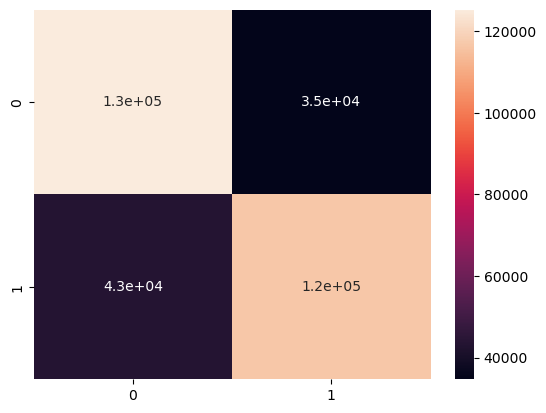

In [95]:
# predicting the test data set

Y_predict_test= NB_classifier.predict(X_test)
cm= confusion_matrix(Y_test, Y_predict_test)
sns.heatmap(cm,annot= True)
cm

In [89]:
cm

array([[125317,  34683],
       [ 43456, 116544]], dtype=int64)

In [94]:
print(classification_report(Y_test, Y_predict_test))


              precision    recall  f1-score   support

           0       0.74      0.78      0.76    160000
           1       0.77      0.73      0.75    160000

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

